In [52]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib
%matplotlib inline

In [2]:
cleaned_data_location = 'data/gapminder_cleaned.csv'
df = pd.read_csv(cleaned_data_location)
df.head()

FileNotFoundError: File b'data/gapminder_cleaned.csv' does not exist

In [8]:
#Defensive programming
VERBOSE = True

cleaned_data_location = '../data/gapminder_cleaned.csv'

try:
    df = pd.read_csv(cleaned_data_location)
    if VERBOSE:
        print(df.head())

except FileNotFoundError:
    print("Could not find data file, check path? You tried", cleaned_data_location)

   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia


In [11]:
#Assert is checking the assumption we were told, which is that the data ends at 2007 so we are sorting and checking the last value = 2007
years = df['year'].unique()
years.sort()
assert years[-1] == 2007

In [16]:
#Calculate mean life expectancy for continent asia in 1952
mask_asia = df['continent'] == 'asia'
df_asia = df[mask_asia]

years= df_asia['year'].unique()
summary = []

for year in years:
    mask_year = df_asia['year'] == year
    df_year = df_asia[mask_year]
    value = np.mean(df_year['lifeexp'])
    summary.append(('asia', year, value))

assert len(summary) == 12

# Turn the summary into a data frame so we can easily visualize it
result_df = pd.DataFrame(summary, columns=['continent', 'year', 'lifeexp'])
result_df

,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


In [20]:
#Calculate mean life expectancy for any continent or category by all years
category = 'pop'
continent = 'africa'

mask_continent = df['continent'] == continent
df_continent = df[mask_continent]

years= df_continent['year'].unique()
summary = []

for year in years:
    mask_year = df_continent['year'] == year
    df_year = df_continent[mask_year]
    value = np.mean(df_year[category])
    summary.append((continent, year, value))

assert len(summary) == 12

# Turn the summary into a data frame so we can easily visualize it
result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
result_df

,continent,year,pop
0,africa,1952,4.570010e+06
1,africa,1957,5.093033e+06
2,africa,1962,5.702247e+06
3,africa,1967,6.447875e+06
4,africa,1972,7.305376e+06
5,africa,1977,8.328097e+06
6,africa,1982,9.602857e+06
7,africa,1987,1.105450e+07
8,africa,1992,1.267464e+07
9,africa,1997,1.430448e+07


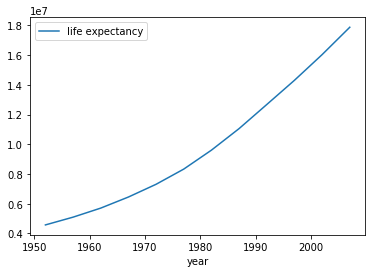

In [24]:
result_df.plot.line('year', category, label = 'life expectancy')

In [31]:
def calculate_mean_over_time(data, category, continent, verbose=False):
        #Calculate mean category for any continent by all years

    # Create a mask that selects the continent of choice    
    mask_continent = data['continent'] == continent
    df_continent = data[mask_continent]

    # Loop over years and calculate the statistic of interest into empty summary list variable
    years= df_continent['year'].unique()
    summary = []

    for year in years:
        if verbose:
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = np.mean(df_year[category])
        summary.append((continent, year, value))

    # There should be 12 records represented for each continent
    assert len(summary) == 12

    # Turn the summary into a data frame so we can easily visualize it
    result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
    return result_df

In [27]:
calculate_mean_over_time(df, 'lifeexp', 'asia', True)

1952
1957
1962
1967
1972
1977
1982
1987
1992
1997
2002
2007


,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


In [47]:
#Calculate any statistic for any continent by all years
def calculate_stat_over_time(data, category, continent, func, verbose=False):
    """Calculate values of a statistic through time
    
    Args:
        data: a data frame
        category: one of the column headers of the data frame (e.g. 'lifeep')
        continent: possible value of continient column in that data frame (e.g. 'asia')
        func: the function to apply to data calues (e.g. np.mean)
        
    Returns:
        a summary table of value per year."""
    
    # check the values
    assert category in data.columns.values, 'Category must allign with data frame'
    assert 'continent' in data.columns.values, 'continent column not found in data frame'
    assert continent in data['continent'].unique(), 'Continent value not found in data frame'
    
    # Create a mask that selects the continent of choice    
    mask_continent = data['continent'] == continent
    df_continent = data[mask_continent]

    # Loop over years and calculate the statistic of interest into empty summary list variable
    years= df_continent['year'].unique()
    summary = []

    for year in years:
        if verbose:
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = func(df_year[category])
        summary.append((continent, year, value))

    # There should be 12 records represented for each continent
    assert len(summary) == 12

    # Turn the summary into a data frame so we can easily visualize it
    result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
    return result_df

In [41]:
calculate_stat_over_time(df, 'lifeexp', 'asia', np.median)

,continent,year,lifeexp
0,asia,1952,44.869
1,asia,1957,48.284
2,asia,1962,49.325
3,asia,1967,53.655
4,asia,1972,56.950
5,asia,1977,60.765
6,asia,1982,63.739
7,asia,1987,66.295
8,asia,1992,68.690
9,asia,1997,70.265


In [43]:
help(calculate_stat_over_time)

Help on function calculate_stat_over_time in module __main__:

calculate_stat_over_time(data, category, continent, func, verbose=False)
    Calculate values of a statistic through time
    
    Args:
        data: a data frame
        category: one of the column headers of the data frame (e.g. 'lifeep')
        continent: possible value of continient column in that data frame (e.g. 'asia')
        func: the function to apply to data calues (e.g. np.mean)
        
    Returns:
        a summary table of calue per year.



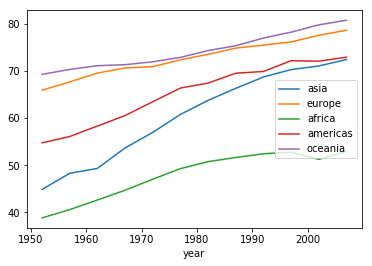

In [54]:
# plot life expectancy over time for all continents
continents = df['continent'].unique()
fig, ax = plt.subplots()

for continent in continents:
    output = calculate_stat_over_time(df, 'lifeexp', continent, np.median)
    output.plot.line('year', 'lifeexp', ax=ax, label=continent)